In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
cd 'My Drive'

/gdrive/My Drive


In [4]:
ls

 17dcs002_resume.pdf
'4CSE Summer Internship (A.Y. 2018-19).gsheet'
'4CSE Summer Internship (A.Y. 2018-19).xlsx'
'5th - September Time Table'
'5th - September Time Table.gsheet'
'Bigmart sales predication'/
 Classroom/
'COA_CSE-A Batch'/
'Colab Notebooks'/
'Copy of Prac1 (1).ipynb'
'Copy of Prac1.ipynb'
 DEADLOCK.docx
 DEADLOCK.gdoc
'Details required to know after completion of internship.gdoc'
'Details required to know after completion of internship.pdf'
 digital-logic-and-computer-design-by-m-morris-mano-2nd-edition.pdf
'First Second Sem B Tech 2017.jpg'
'Getting started.pdf'
 IMG-20200107-WA0021.jpg
'internship ppt-final (1).pptx'
'IOT Weather Reporting System Project.pptx'
'jQuery.zip (Unzipped Files)'/
'Lab Work'/
'machine learning'/
'PHP.zip (Unzipped Files)'/
 Prac1.ipynb
 Practicals.docx
'Tableau Workshop - 22ndFeb'/
'TCS-Codevita CSE(2017Batch).gsheet'
'TCS-Codevita CSE(2017Batch).xlsx'
 thingspeak/


In [6]:
cd 'Bigmart sales predication'

/gdrive/My Drive/Bigmart sales predication


In [7]:
ls

Bigmart.ipynb  Submission.csv  Test.csv  Train.csv


In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('Train.csv')

**Now we'll be exploring Training Data**

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27dd614400>,
      dtype=object)

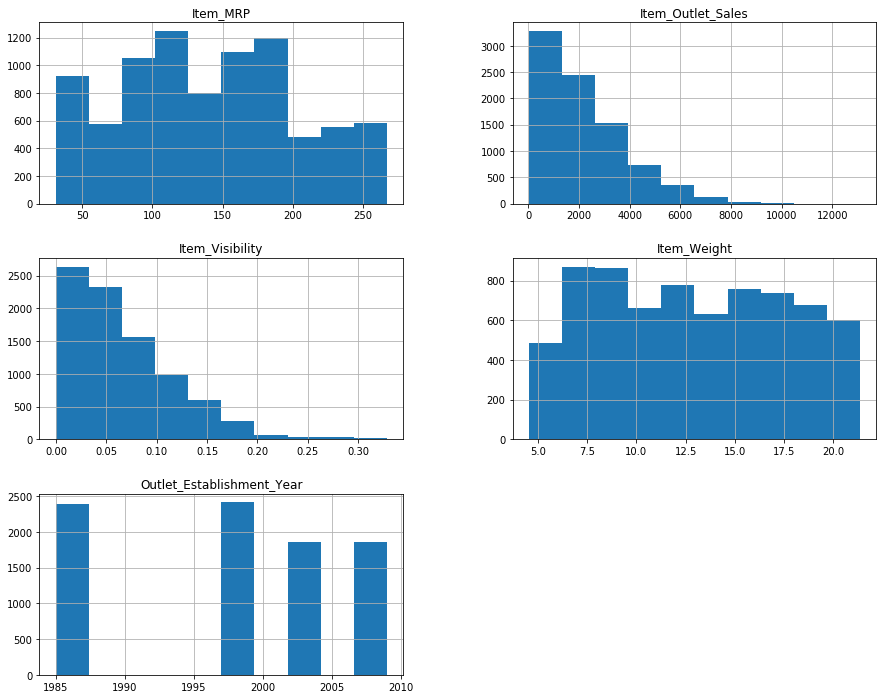

In [13]:
df.hist(figsize=(15,12))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Column ITEM WEIGHT and OUTLET SIZE contain missing values.**

**Lets see correlation b/w target and** **features** 

In [15]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

**ITEM_MRP seems to have a good correlation with targeted ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value**

**Lets start checking columns relation with Target ITEM_OUTLET_SALES Price**

First is ITEM_IDENTIFIER

In [16]:
df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDU12     9
DRE49     9
NCI54     9
         ..
FDN52     1
FDO33     1
DRF48     1
FDT35     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

**From above output we can say that ITEM_IDENTIFIER should be categorical columns**

**Since ITEM_WEIGHT column correlation strength is very low so we can drop it**

**Next Column is ITEM_FAT_CONTENT**

In [17]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category by**

In [0]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')

In [0]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [21]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**For further data processing we need to convert column type into their correct type**

In [0]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')

df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')

Now ITEM_MRP column. Correlation strength of this column with target column is very high so we need can exploit this column for further infomation about target column

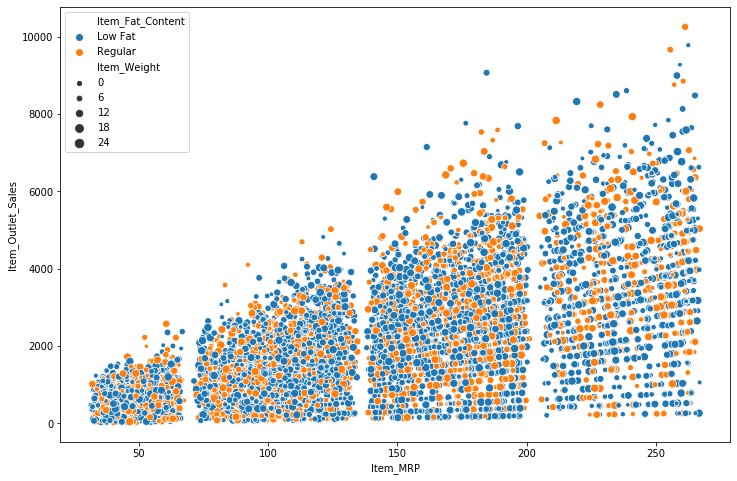

In [24]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)


**ITEM_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing** 

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


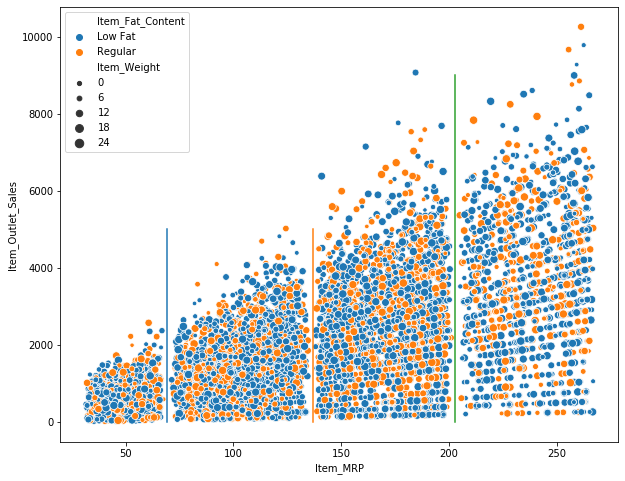

In [26]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

**We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value. Now**

In [0]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Now lets explore other columns**

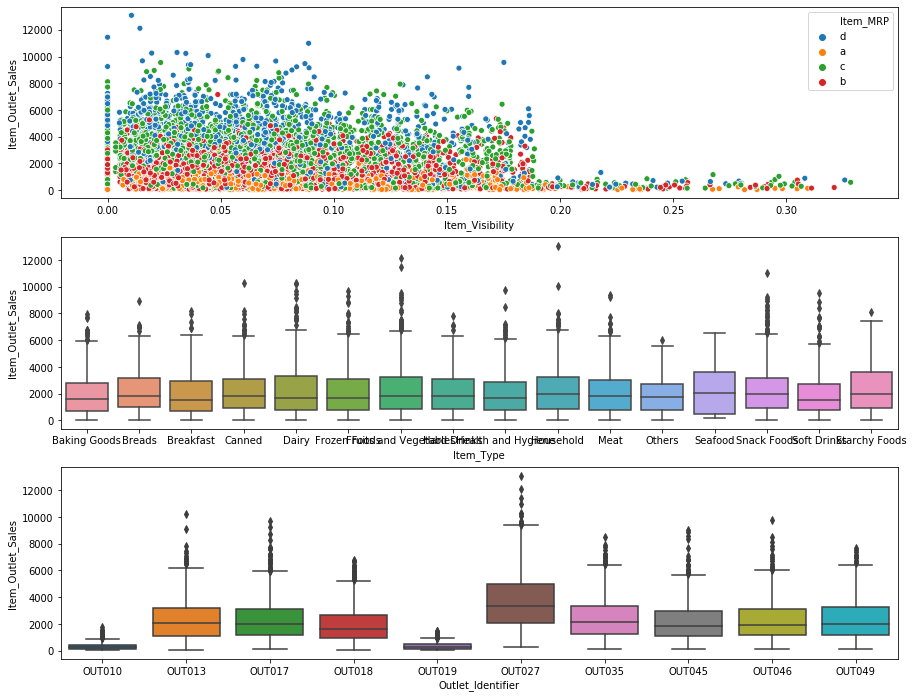

In [29]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

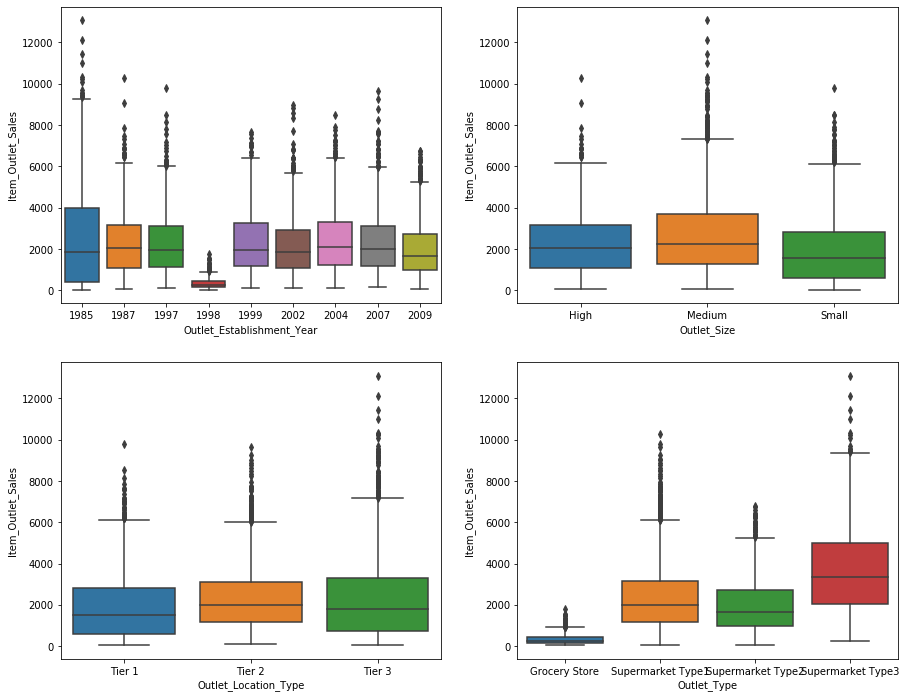

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

**From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column.**

**Therefore Columns for model training will be**

In [0]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

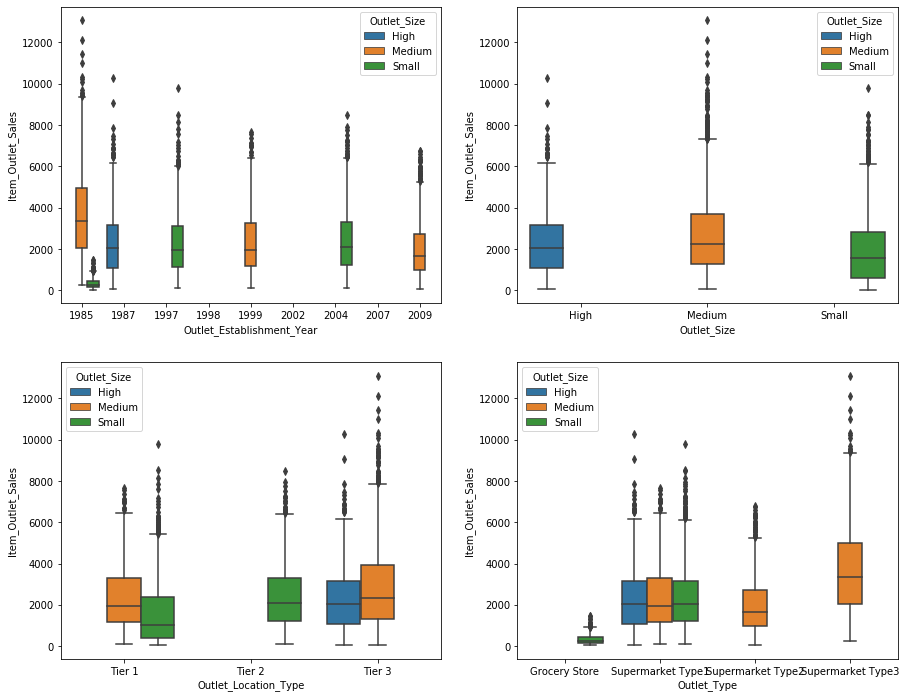

In [34]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)


In [0]:
data=df[attributes]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


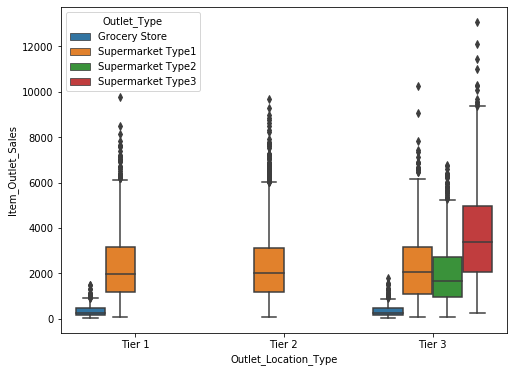

In [37]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

In [38]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


**One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null**

In [39]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [40]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
...,...,...,...,...,...,...,...,...
8473,c,Grocery Store,Tier 3,NaN,1998,OUT010,Hard Drinks,431.4384
8480,c,Grocery Store,Tier 1,Small,1985,OUT019,Snack Foods,459.4020
8486,a,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,45.2744
8490,c,Grocery Store,Tier 1,Small,1985,OUT019,Fruits and Vegetables,487.3656


In [41]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [42]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [43]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

**Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop**

**Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop**

In [0]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [0]:

data.Outlet_Size=data.apply(func,axis=1)

**Now lets checkout OUTLIERS**

In [46]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052


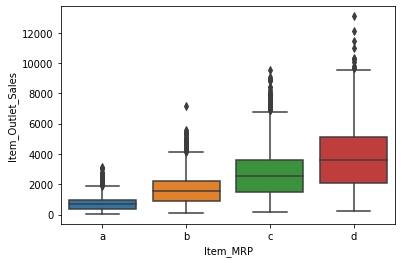

In [47]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [48]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [49]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [50]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

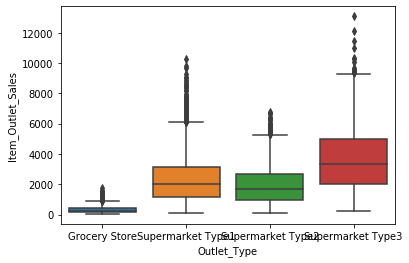

In [51]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

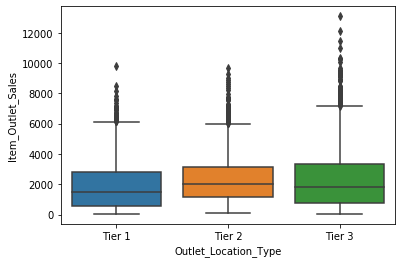

In [52]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [53]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [54]:
data[data['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [0]:
data=data.drop(index=4289)

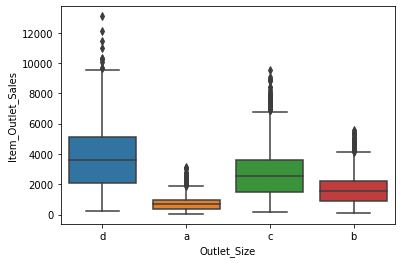

In [56]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

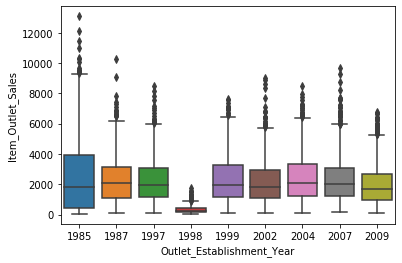

In [57]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [0]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

In [0]:
data_dummy['Item_Outlet_Sales']=data_label

In [60]:
data_dummy.shape

(8521, 35)

**Now we are ready to apply ML algorithms**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)

In [64]:
train.shape , test.shape

((6816, 35), (1705, 35))

In [0]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

**Applying Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr=LinearRegression()

In [79]:
lr.fit(train, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
predict_lr=lr.predict(test)

In [0]:
mse=mean_squared_error(test_label,predict_lr)

In [0]:
lr_score=np.sqrt(mse)

In [84]:
lr_score

1172.0122878325346

**Cross Val for Linear Regression**

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
lr_score_cross=np.sqrt(-score)

In [88]:
np.mean(lr_score_cross),np.std(lr_score_cross)

(1149.4254158305741, 32.5001509200018)

In [89]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(train,train_label)
predict_r=r.predict(test)
mse=mean_squared_error(test_label,predict_r)
r_score=np.sqrt(mse)
r_score

1170.8362071061267

**Cross Val Ridge**

In [90]:
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,train,train_label,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1148.0004939635598, 33.21382895301165)

**LASSO**

In [91]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(train,train_label)
predict_l=l.predict(test)
mse=mean_squared_error(test_label,predict_l)
l_score=np.sqrt(mse)
l_score


1170.8379343600716

**Cross VAl LAsso**

In [92]:
l=Lasso(alpha=0.01)
score=cross_val_score(l,train,train_label,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

(1148.0004285351881, 33.21601770572287)

**Elastic NEt**

In [95]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
en.fit(train,train_label)
predict_r=en.predict(test)
mse=mean_squared_error(test_label,predict_r)
en_score=np.sqrt(mse)
en_score


1171.9700046424412

**Cross val Elastic**

In [96]:
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
score=cross_val_score(en,train,train_label,cv=10,scoring='neg_mean_squared_error')
en_score_cross=np.sqrt(-score)
np.mean(en_score_cross),np.std(en_score_cross)

(1148.1235514055243, 33.779501585825265)

**Stochastic gradient**

In [105]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2',max_iter=100,alpha=0.05)
sgd.fit(train,train_label)
predict_r=sgd.predict(test)
mse=mean_squared_error(test_label,predict_r)
sgd_score=np.sqrt(mse)
sgd_score

1193.701278325283

**Cross Val Stochastic Gradient**


In [107]:
sgd=SGDRegressor(penalty='l2',max_iter=100,alpha=0.05)
score=cross_val_score(sgd,train,train_label,cv=10,scoring='neg_mean_squared_error')
sgd_score_cross=np.sqrt(-score)
np.mean(sgd_score_cross),np.std(sgd_score_cross)

(1163.1878765122449, 38.27162693340752)

**SVR**


In [108]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(train,train_label)
predict_r=svm.predict(test)
mse=mean_squared_error(test_label,predict_r)
svm_score=np.sqrt(mse)
svm_score

1372.7850836640566

**Cross VAl SVR**

In [109]:
svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,train,train_label,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)

(1331.8065213221926, 44.931011641419566)

**Decision Tree**

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(train,train_label)
predict_r=dtr.predict(test)
mse=mean_squared_error(test_label,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1123.1955839571694

**Cross Val Decision Tree**

In [111]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1097.216824037842, 32.98894477916791)

**Random Forest**

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

1122.800780162653

**Cross Val RandomForest**

In [113]:
rf=RandomForestRegressor()
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1097.4218204245356, 32.811130570721815)

**Bagging Regressoion**

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:
br=BaggingRegressor(max_samples=70)

In [116]:
br.fit(train,train_label)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=70, n_estimators=10, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [0]:
score=br.predict(test)

In [0]:
br_score=mean_squared_error(test_label,score)

In [119]:
br_score=np.sqrt(br_score)
br_score

1148.4676595925769

**Cross Val Bagging**

In [120]:
br=BaggingRegressor()
score=cross_val_score(br,train,train_label,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
np.mean(br_score_cross),np.std(br_score_cross)

(1097.9285396212547, 32.55417117041184)

**ADAPTIVE BOOSTING**

In [121]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(train,train_label)
g=ada.predict(test)
ada_score=mean_squared_error(test_label,g)
ada_score=np.sqrt(ada_score)
ada_score

1208.42538256391

**Cross val for ADA BOOST**

In [122]:
ada=AdaBoostRegressor()
score=cross_val_score(ada,train,train_label,cv=10,scoring='neg_mean_squared_error')
ada_score_cross=np.sqrt(-score)
np.mean(ada_score_cross),np.std(ada_score_cross)

(1177.5241415756236, 25.492465548548058)

**Gradient BOOSTING**

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train,train_label)
p=gbr.predict(test)
gb_score=mean_squared_error(test_label,p)
gb_score=np.sqrt(gb_score)
gb_score

1122.6951622673103

**Cross Val for Gb**

In [124]:
gb=GradientBoostingRegressor()
score=cross_val_score(gb,train,train_label,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(1096.661955906873, 33.23199448477192)

**Dataframe**

In [0]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [0]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,en_score,en_score_cross,
                     sgd_score,sgd_score_cross,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross,
                     ada_score,ada_score_cross,br_score,br_score_cross,gb_score,gb_score_cross]},index=name)

In [0]:
go['RMSE']=go.applymap(lambda x: x.mean())

In [128]:
go.RMSE.sort_values()

Gradient Boost CV            1096.661956
Decision Tree Regression     1097.216824
Random Forest CV             1097.421820
Bagging CV                   1097.928540
Gradient Boost               1122.695162
Random Forest                1122.800780
Decision Tree                1123.195584
Lasso Regression CV          1148.000429
Ridge Regression CV          1148.000494
Elastic Net Regression CV    1148.123551
Bagging                      1148.467660
Linear Regression CV         1149.425416
SGD Regression CV            1163.187877
Ridge Regression             1170.836207
Lasso Regression             1170.837934
Elastic Net Regression       1171.970005
Linear Regression            1172.012288
Ada Boost CV                 1177.524142
SGD Regression               1193.701278
Ada Boost                    1208.425383
SVM CV                       1331.806521
SVM                          1372.785084
Name: RMSE, dtype: float64

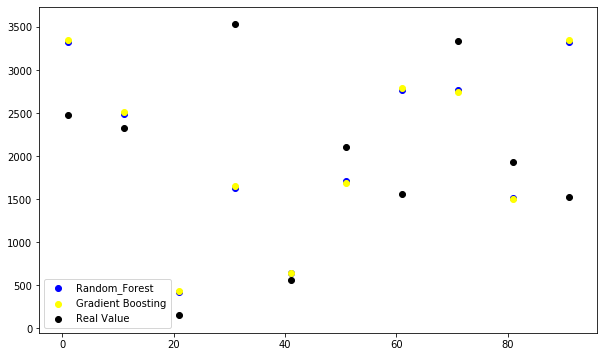

In [129]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),p[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),test_label[0:100:10],color='black')
plt.legend(['Random_Forest','Gradient Boosting','Real Value'])

**It seems like Gradient Boosting doing better than others
So lets Do grid search on to tune hyper parameter**

In [0]:
from sklearn.model_selection import GridSearchCV

In [131]:
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(train,train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_...ne,
                         

In [132]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=18, max_leaf_nodes=9,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
gb=gs.best_estimator_

**Now Train our model on Training Data**

In [0]:
total=pd.concat([train,test],axis=0,ignore_index=True)

In [0]:
total_label=pd.concat([train_label,test_label],axis=0,ignore_index=True)

In [136]:
total_label.shape,total.shape

((8521,), (8521, 34))

In [137]:
gb.fit(total,total_label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=18, max_leaf_nodes=9,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**TEST IMPORTING**

In [0]:
test=pd.read_csv('Test.csv')

In [142]:
test.shape


(5681, 11)

**Test Data Preprocessing**

In [0]:
attributes=['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [0]:
test=test[attributes]

In [145]:
test.shape

(5681, 7)

In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null float64
Outlet_Type                  5681 non-null object
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null object
Item_Type                    5681 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [0]:
test.Item_MRP=pd.cut(test.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)
test.Item_Type=test.Item_Type.astype('category')
test.Outlet_Size=test.Outlet_Size.astype('category')
test.Outlet_Identifier=test.Outlet_Identifier.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('int64')
test.Outlet_Type=test.Outlet_Type.astype('category')
test.Outlet_Location_Type=test.Outlet_Location_Type.astype('category')

In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(6), int64(1)
memory usage: 79.5 KB


In [0]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null category
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(7)
memory usage: 41.1 KB


In [0]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [0]:
test.Outlet_Size=test.apply(func,axis=1)

In [0]:
test_dummy=pd.get_dummies(test.iloc[:,0:6])

In [154]:
test_dummy.head()

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_a,Outlet_Size_b,Outlet_Size_c,Outlet_Size_d,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**Now predict price of test data with our ML Model**

In [0]:
predict=gb.predict(test_dummy)

In [156]:
predict.shape

(5681,)

In [0]:
sample=pd.read_csv('Submission.csv')

In [158]:
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [0]:
del sample['Item_Outlet_Sales']

In [160]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1740.650015
1,FDW14,OUT017,2170.585779
2,NCN55,OUT010,769.969590
3,FDQ58,OUT017,2678.856114
4,FDY38,OUT027,5132.342223
...,...,...,...
5676,FDB58,OUT046,2125.349497
5677,FDD47,OUT018,2752.520455
5678,NCO17,OUT045,2169.036463
5679,FDJ26,OUT017,2614.663465


In [0]:
corr_ans.to_csv('correct.csv',index=None)